In [8]:
import tensorflow
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras import models,layers

In [3]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()
# above we have partitioned the data into train and test

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
image_index = 5555
print(y_train[image_index])

7


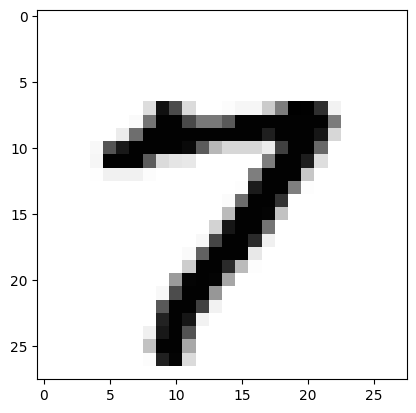

In [6]:
plt.imshow(x_train[image_index],cmap='Greys')
plt.show()

# Data Pre-Processing


4d form as input

In [6]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
# 1 is for number of channels
# number of channels is 1 as it is a black and white picture

In [7]:
input_shape = (28,28,1)


now we convert our data to float 

In [9]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

Now we convert our data to be in the range of 0 to 1

In [10]:
x_train = x_train / 255
x_test = x_test / 255

# Now we initialize the model
model = Sequential()

In [12]:
# build the model
# C1 Convolutional Layer
model.add(layers.Conv2D(6,kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(28,28,1), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(1,1),padding='valid'))

# C3 Consolutional Layer
model.add(layers.Conv2D(16,kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120,kernel_size=(5,5), strides=(1,1), activation='tanh', padding='valid'))

# Flatten CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fuly Connected Layer with tanh activation function
model.add(layers.Dense(84, activation='tanh'))

# Output Layer with softmax activation function
model.add(layers.Dense(10,activation='softmax'))


C:\Users\anshb\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
# compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 27, 27, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 23, 23, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 11, 11, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │       494,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 545,546 (2.08 MB)

 Trainable params: 545,546 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# train our Convolutional Neural Network
hist = model.fit(x=x_train, y=y_train, epochs=10, batch_size=128, validation_data=(x_test,y_test), verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.7417 - loss: 1.0628 - val_accuracy: 0.9091 - val_loss: 0.3308
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9077 - loss: 0.3260 - val_accuracy: 0.9273 - val_loss: 0.2559
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.9252 - loss: 0.2600 - val_accuracy: 0.9384 - val_loss: 0.2151
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9357 - loss: 0.2213 - val_accuracy: 0.9476 - val_loss: 0.1898
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9441 - loss: 0.1939 - val_accuracy: 0.9520 - val_loss: 0.1686
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9506 - loss: 0.1714 - val_accuracy: 0.9578 - val_loss: 0.1536
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.9561 - loss: 0.1548 - val_accuracy: 0.9599 - val_loss: 0.1401
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 19s 41ms/step - accuracy: 0.9602 - loss: 0.1423 - 

In [15]:
print(hist.history)

{'accuracy': [0.8402000069618225, 0.912933349609375, 0.9277833104133606, 0.9386666417121887, 0.9463000297546387, 0.9518833160400391, 0.9568166732788086, 0.9607999920845032, 0.9642166495323181, 0.9671499729156494], 'loss': [0.6379534602165222, 0.30470746755599976, 0.24834226071834564, 0.21270835399627686, 0.18767881393432617, 0.16845408082008362, 0.15283842384815216, 0.13995952904224396, 0.12863199412822723, 0.11879339814186096], 'val_accuracy': [0.9090999960899353, 0.927299976348877, 0.9383999705314636, 0.9476000070571899, 0.9520000219345093, 0.9577999711036682, 0.9599000215530396, 0.9628999829292297, 0.9663000106811523, 0.9670000076293945], 'val_loss': [0.33079102635383606, 0.25592389702796936, 0.2151177078485489, 0.18979796767234802, 0.16860492527484894, 0.1535801887512207, 0.14006361365318298, 0.12867698073387146, 0.11892590671777725, 0.11305098980665207]}


Text(0, 0.5, 'acc')

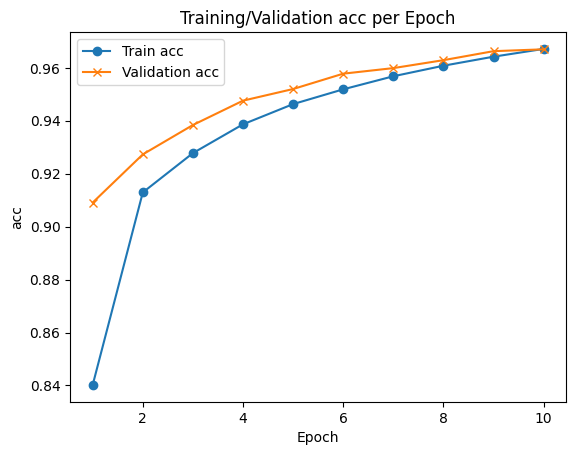

In [16]:
import matplotlib.pyplot as plt

f, ax = plt.subplots()
ax.plot([None] + hist.history['accuracy'], 'o-')
ax.plot([None] + hist.history['val_accuracy'], 'x-')
ax.legend(['Train acc', 'Validation acc'], loc=0)
ax.set_title('Training/Validation acc per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('acc')

Text(0, 0.5, 'Loss')

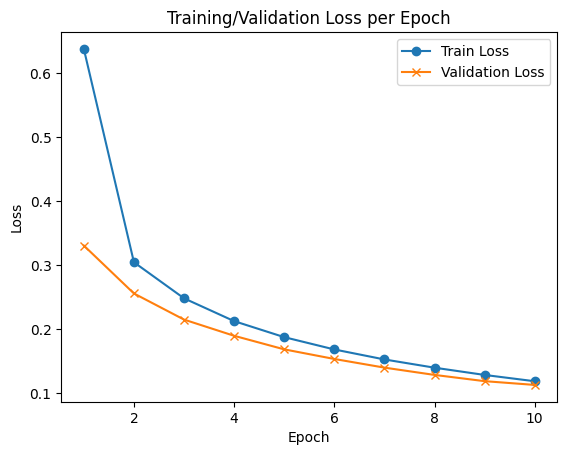

In [17]:
import matplotlib.pyplot as plt
f,ax = plt.subplots()

ax.plot([None] + hist.history['loss'],'o-')
ax.plot([None] + hist.history['val_loss'],'x-')
# Plot legend and use the location automatically: loc = 0
ax.legend(['Train Loss','Validation Loss'], loc=0)
ax.set_title('Training/Validation Loss per Epoch')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')

In [18]:
# Predict the value
model.predict(x_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step


array([[4.5418197e-05, 1.6932947e-05, 1.6657851e-04, 2.6027046e-04,
        5.9407572e-05, 1.0118085e-04, 1.0422018e-06, 9.9905890e-01,
        1.0671688e-05, 2.7961930e-04],
       [2.9398894e-03, 1.2300527e-03, 9.7949320e-01, 6.2044589e-03,
        1.1629677e-05, 1.1285148e-03, 7.2508911e-03, 2.6789075e-06,
        1.7293937e-03, 9.3992467e-06],
       [6.7237143e-06, 9.9745351e-01, 1.1560249e-03, 1.6855585e-04,
        2.9318169e-05, 3.1654792e-05, 6.1698927e-04, 1.5258964e-04,
        3.7006967e-04, 1.4513851e-05],
       [9.9352223e-01, 3.5965816e-06, 1.0289683e-03, 7.5075316e-04,
        7.2849187e-05, 1.0073630e-03, 1.9296249e-03, 5.4691965e-04,
        1.4432518e-04, 9.9340233e-04]], dtype=float32)

In [19]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])